In [85]:
# Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [86]:
# Connect to database
conn = sqlite3.connect("/Users/jayelin/Downloads/docker_image/data/bmarket.db")

# Fetch all rows from the 'bank_marketing' table
cursor = conn.cursor()
# cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
cursor.execute("SELECT * FROM bank_marketing")
rows = cursor.fetchall()

# Create DataFrame from the results
columns = [description[0] for description in cursor.description]  # Get column names
df = pd.DataFrame(rows, columns=columns)

# Print the DataFrame
print(df)

# Close the connection
conn.close()


       Client ID       Age   Occupation Marital Status      Education Level  \
0          32885  57 years   technician        married          high.school   
1           3170  55 years      unknown        married              unknown   
2          32207  33 years  blue-collar        married             basic.9y   
3           9404  36 years       admin.        married          high.school   
4          14021  27 years    housemaid        married          high.school   
...          ...       ...          ...            ...                  ...   
41183       6266  58 years      retired        married  professional.course   
41184      11285  37 years   management        married    university.degree   
41185      38159  35 years       admin.        married          high.school   
41186        861  40 years   management        married    university.degree   
41187      15796  29 years       admin.         single    university.degree   

      Credit Default Housing Loan Personal Loan Con

In [87]:
# Check for missing values
df.isnull().sum()  

Client ID                    0
Age                          0
Occupation                   0
Marital Status               0
Education Level              0
Credit Default               0
Housing Loan             24789
Personal Loan             4146
Contact Method               0
Campaign Calls               0
Previous Contact Days        0
Subscription Status          0
dtype: int64

In [88]:
# Check number of rows and columns
df.shape

(41188, 12)

In [89]:
# View statistics
df.describe(include="all")

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
count,41188.00000,41188,41188,41188,41188,41188,16399,37042,41188,41188.000000,41188.000000,41188
unique,NaN,77,12,4,8,3,3,3,4,NaN,NaN,2
top,NaN,150 years,admin.,married,university.degree,no,yes,no,Cell,NaN,NaN,no
freq,NaN,4197,10422,24928,12168,32588,8595,30532,13100,NaN,NaN,36548
mean,20594.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.051374,962.475454,NaN
std,11890.09578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.171345,186.910907,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-41.000000,0.000000,NaN
25%,10297.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,NaN
50%,20594.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,NaN
75%,30891.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,NaN


In [90]:
# View data types
df.dtypes

# extract int from age

Client ID                 int64
Age                      object
Occupation               object
Marital Status           object
Education Level          object
Credit Default           object
Housing Loan             object
Personal Loan            object
Contact Method           object
Campaign Calls            int64
Previous Contact Days     int64
Subscription Status      object
dtype: object

In [91]:
# View first 10 rows
df.head(10)

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no
5,17202,58 years,retired,married,professional.course,no,None,yes,Cell,1,999,no
6,880,48 years,services,married,high.school,unknown,yes,no,Telephone,1,999,no
7,23758,150 years,admin.,divorced,university.degree,unknown,yes,None,Cell,7,999,no
8,10822,24 years,entrepreneur,married,university.degree,no,None,None,telephone,4,999,no
9,14356,36 years,technician,divorced,professional.course,no,yes,yes,Cell,4,999,no


In [92]:
# List unique values of each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}' ({len(unique_values)} unique values):")
    print(unique_values)
    print()

# housing loan, has 4 unique values but none (or null) carries the same meaning as unknown
# personal loan, has 4 unique values but none (or null) carries the same meaning as unknown
# contact method, Telephone can be replaced with telephone (assumed to be landline)
# contact method, Cell can be replaced with cellular (assumed to be mobile)

Unique values in 'Client ID' (41188 unique values):
[32885  3170 32207 ... 38159   861 15796]

Unique values in 'Age' (77 unique values):
['57 years' '55 years' '33 years' '36 years' '27 years' '58 years'
 '48 years' '150 years' '24 years' '34 years' '42 years' '43 years'
 '26 years' '37 years' '46 years' '59 years' '49 years' '30 years'
 '51 years' '45 years' '31 years' '41 years' '38 years' '47 years'
 '69 years' '50 years' '25 years' '39 years' '44 years' '52 years'
 '35 years' '77 years' '40 years' '56 years' '53 years' '60 years'
 '29 years' '28 years' '54 years' '32 years' '81 years' '63 years'
 '21 years' '22 years' '74 years' '80 years' '62 years' '68 years'
 '86 years' '23 years' '71 years' '67 years' '65 years' '20 years'
 '19 years' '66 years' '75 years' '18 years' '72 years' '70 years'
 '82 years' '85 years' '61 years' '88 years' '83 years' '78 years'
 '64 years' '17 years' '76 years' '73 years' '79 years' '89 years'
 '84 years' '91 years' '98 years' '92 years' '95 years']


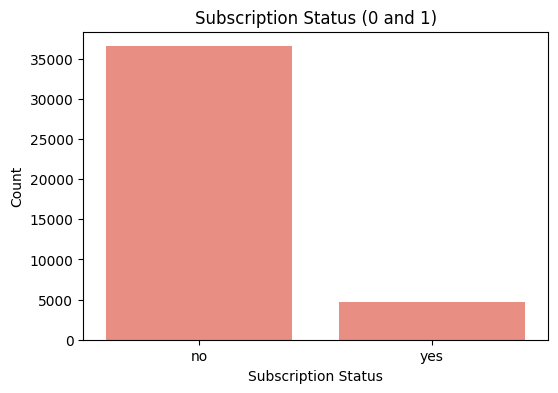

In [93]:
# Distribution of subsription status
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Subscription Status'], color='salmon')
plt.title('Subscription Status (0 and 1)')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.xticks([0, 1])  # Set the x-axis ticks to show only 0 and 1
plt.show()

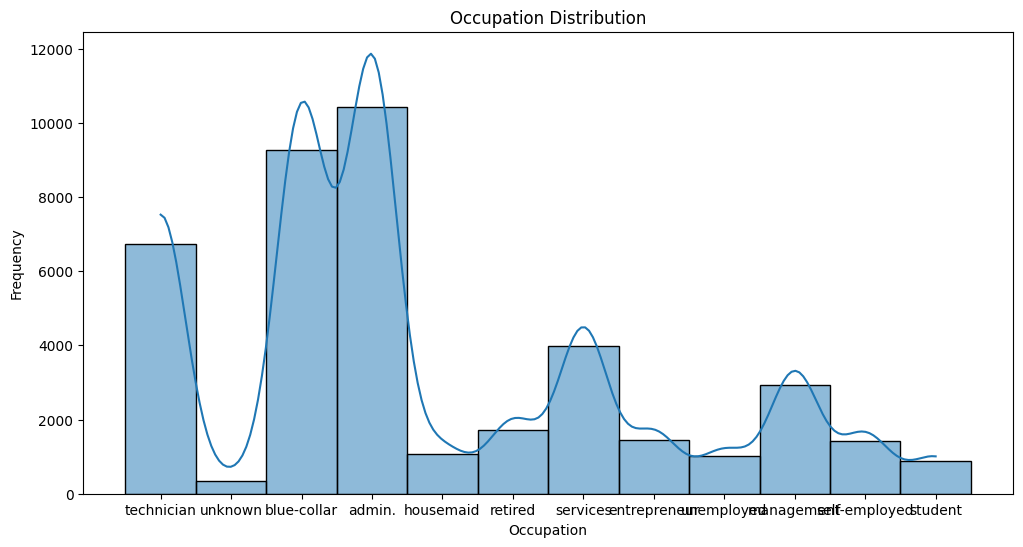

In [94]:
# Distribution of occupation

plt.figure(figsize=(12, 6))
sns.histplot(df['Occupation'], bins=20, kde=True)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.show()

In [95]:
# Data cleaning
def yes_no_binary(yes_no_str):
    
    if yes_no_str == 'no':
        return 0
    elif yes_no_str == 'yes':
        return 1
    else:
        return -1
    
def mobile_binary(mobile_str):
    
    if mobile_str == 'Telephone':
        return 'telephone'
    elif mobile_str == 'Cell':
        return 'cellular'
    else:
        return mobile_str

df['Housing Loan'] = df['Housing Loan'].apply(yes_no_binary)
df['Personal Loan'] = df['Personal Loan'].apply(yes_no_binary)
df['Subscription Status'] = df['Subscription Status'].apply(yes_no_binary)
df['Credit Default'] = df['Credit Default'].apply(yes_no_binary)
df['Contact Method'] = df['Contact Method'].apply(mobile_binary)
df.head()

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,0,0,1,cellular,1,999,0
1,3170,55 years,unknown,married,unknown,-1,1,0,telephone,2,999,0
2,32207,33 years,blue-collar,married,basic.9y,0,0,0,cellular,1,999,0
3,9404,36 years,admin.,married,high.school,0,0,0,telephone,4,999,0
4,14021,27 years,housemaid,married,high.school,0,-1,0,cellular,2,999,0


In [96]:
# Feature engineering
def contact_binary(str):
    if str == 'telephone':
        return 1
    elif str == 'cellular':
        return 2

def occupation_binary(str):
    if str == 'technician':
        return 1
    elif str == 'blue-collar':
        return 2
    elif str == 'admin.':
        return 3
    elif str == 'housemaid':
        return 4
    elif str == 'retired':
        return 5
    elif str == 'services':
        return 6
    elif str == 'entrepreneur':
        return 7
    elif str == 'unemployed':
        return 8
    elif str == 'management':
        return 9
    elif str == 'self-employed':
        return 10
    elif str == 'student':
        return 11
    elif str == 'unknown':
        return -1
    
def marital_binary(str):
    if str == 'married':
        return 1
    elif str == 'divorced':
        return 2
    elif str == 'single':
        return 3
    elif str == 'unknown':
        return -1

def education_binary(str):
    if str == 'illiterate':
        return 1
    elif str == 'basic.4y':
        return 2
    elif str == 'basic.6y':
        return 3
    elif str == 'basic.9y':
        return 4
    elif str == 'high.school':
        return 5
    elif str == 'professional.course':
        return 6
    elif str == 'university.degree':
        return 7
    elif str == 'unknown':
        return -1
    
def previous_contact_days_binary(str):
    if str == 999:
        return -1
    else:
        return str

df['Age'] = df['Age'].str.extract(r'(\d+)').astype(int)
df['Contact Method'] = df['Contact Method'].apply(contact_binary)
df['Occupation'] = df['Occupation'].apply(occupation_binary)
df['Marital Status'] = df['Marital Status'].apply(marital_binary)
df['Education Level'] = df['Education Level'].apply(education_binary)
df['Previous Contact Days'] = df['Previous Contact Days'].apply(previous_contact_days_binary)
df.head(10)

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57,1,1,5,0,0,1,2,1,-1,0
1,3170,55,-1,1,-1,-1,1,0,1,2,-1,0
2,32207,33,2,1,4,0,0,0,2,1,-1,0
3,9404,36,3,1,5,0,0,0,1,4,-1,0
4,14021,27,4,1,5,0,-1,0,2,2,-1,0
5,17202,58,5,1,6,0,-1,1,2,1,-1,0
6,880,48,6,1,5,-1,1,0,1,1,-1,0
7,23758,150,3,2,7,-1,1,-1,2,7,-1,0
8,10822,24,7,1,7,0,-1,-1,1,4,-1,0
9,14356,36,1,2,6,0,1,1,2,4,-1,0


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Client ID,41188.0,20594.500000,11890.095780,1.0,10297.75,20594.5,30891.25,41188.0
Age,41188.0,51.231572,34.708486,17.0,33.00,40.0,51.00,150.0
Occupation,41188.0,3.916092,2.831190,-1.0,2.00,3.0,6.00,11.0
Marital Status,41188.0,1.669807,0.891379,-1.0,1.00,1.0,3.00,3.0
Education Level,41188.0,4.902010,2.025168,-1.0,4.00,5.0,7.00,7.0
Credit Default,41188.0,-0.208653,0.406530,-1.0,0.00,0.0,0.00,1.0
Housing Loan,41188.0,-0.402714,0.811114,-1.0,-1.00,-1.0,0.00,1.0
Personal Loan,41188.0,0.014810,0.508432,-1.0,0.00,0.0,0.00,1.0
Contact Method,41188.0,1.634748,0.481507,1.0,1.00,2.0,2.00,2.0
Campaign Calls,41188.0,2.051374,3.171345,-41.0,1.00,2.0,3.00,56.0


In [98]:
# Store correlation in variable 'corr_df'
corr_df = df.corr(numeric_only=True)

# Create a heat map displaying correlation statistics of all the numerical features.
fig = px.imshow(corr_df)
fig.update_xaxes(side="top")
fig.show()

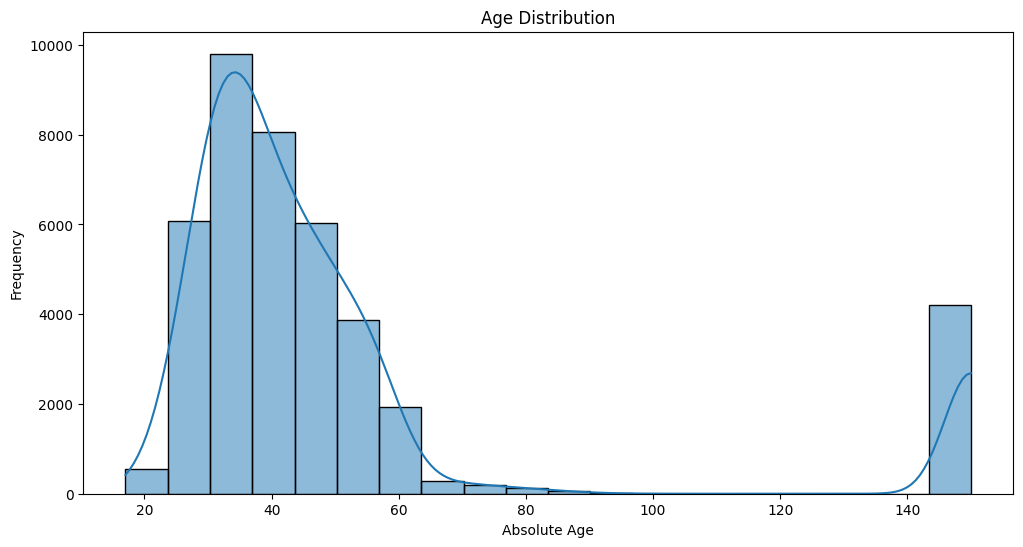

In [99]:
# View age distribution

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Absolute Age')
plt.ylabel('Frequency')
plt.show()

In [100]:
# View number of records > age 140
df[(df.Age > 140)]

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
7,23758,150,3,2,7,-1,1,-1,2,7,-1,0
13,21872,150,3,1,7,0,0,0,2,3,-1,1
17,17689,150,1,1,6,0,-1,1,2,-11,-1,0
51,38203,150,5,1,5,0,-1,0,2,1,-1,0
59,29732,150,2,1,2,-1,-1,0,2,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41119,25852,150,3,1,7,0,1,0,2,1,-1,0
41122,11535,150,2,1,4,0,-1,0,1,2,-1,0
41150,10628,150,8,1,4,-1,1,0,1,5,-1,0
41178,41091,150,3,3,7,0,-1,1,2,2,3,0
